# IMPORTING & MERGING DATA

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import sklearn as sk #this is the most popular library for statistics and machine learning

In [2]:
df_steps = pd.read_csv('steps.csv', delimiter=';')
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_survey = pd.read_csv('survey.csv')
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df_both = pd.merge(df_survey,df_steps, on = 'id')
df_both.head()
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [5]:
df_both['weight'].value_counts()


72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

In [6]:
df_full = pd.DataFrame(df_both)
df_full.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_full.columns.get_loc('20-6-2013')

9

In [8]:
df_full.columns.get_loc('13-5-2014')

336

# CLEANING THE DATA

The merged dataframe will now be used to check for any outliers and will be cleaned accordingly.

In [9]:

df_full['gender'].value_counts()

Male      494
Female    435
Name: gender, dtype: int64

In [10]:
df_full['height'].value_counts()

170.0    70
160.0    54
175.0    54
165.0    51
172.0    50
180.0    50
173.0    36
163.0    33
178.0    31
168.0    31
183.0    30
176.0    29
162.0    28
169.0    28
158.0    25
185.0    25
167.0    24
182.0    23
174.0    23
157.0    18
187.0    18
171.0    17
186.0    17
181.0    16
177.0    15
164.0    15
166.0    15
161.0    15
179.0    14
156.0    12
190.0    11
184.0    11
155.0     8
188.0     7
192.0     5
153.0     4
159.0     4
195.0     3
150.0     2
189.0     2
145.0     1
152.0     1
193.0     1
151.0     1
Name: height, dtype: int64

In [11]:
df_full['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

The function below will replace all values below the 45 for the weight segment to a NaN value as these weights will be considered as false data.

In [12]:
def weight_below45(x):
    if (x <= 45) or (x >=300):
        return float('NaN')
    else:
        return x
df_full['weight'] = df_full['weight'].apply(weight_below45)

In [13]:
df_full['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
102.0     1
116.0     1
128.0     1
115.0     1
101.0     1
Name: weight, Length: 67, dtype: int64

## PARTICIPANT'S AVERAGES

Below the averages of the participants will be measured

In [14]:
df_full['average steps'] = df_full.iloc[:,9:336].mean(axis=1,skipna=True)
df_full.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [15]:
df_full['average steps'].value_counts().sort_index(0)

C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_10116/1561179513.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  df_full['average steps'].value_counts().sort_index(0)


4.000000         1
842.000000       1
1032.500000      1
1210.000000      1
1218.500000      1
                ..
22842.716846     1
30373.808917     1
43912.307692     1
58491.067568     1
201722.600000    1
Name: average steps, Length: 925, dtype: int64

as can be seen in the table above, a new column with average steps was added to to the dataframe.

In [16]:
def averagestepsbelow25k(x):
    if (x >= 25000) or (x <=100):
        return float('NaN')
    else:
        return x
df_full['average steps'] = df_full['average steps'].apply(averagestepsbelow25k)

In [17]:
df_full['average steps'].value_counts().sort_index(0)

C:\Users\GEBRUI~1\AppData\Local\Temp/ipykernel_10116/1561179513.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  df_full['average steps'].value_counts().sort_index(0)


842.000000      1
1032.500000     1
1210.000000     1
1218.500000     1
1289.555556     1
               ..
16378.346154    1
16487.871166    1
19893.464706    1
20414.067039    1
22842.716846    1
Name: average steps, Length: 920, dtype: int64

Another if else statement was used to remove outliers in the average step column as these number are asumed to be caused by false data entries and can hinder the future analysis

# DATASET ANALYSIS

Below, all steps of the exploratory data analysis will be displayed. 

## DISTRIBUTION ANALYSIS

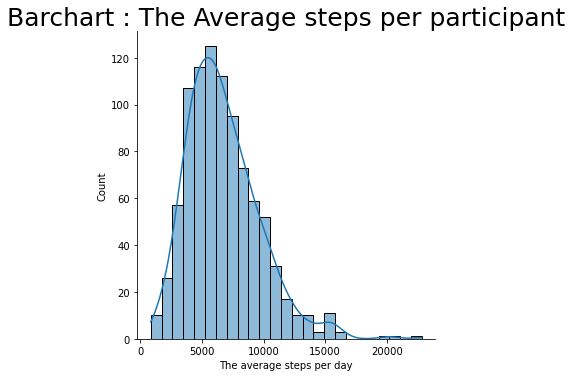

In [18]:
sns.displot(df_full['average steps'], bins=25, kde=True)
plt.title('Barchart : The Average steps per participant', fontsize=25)
plt.xlabel('The average steps per day')
plt.show()

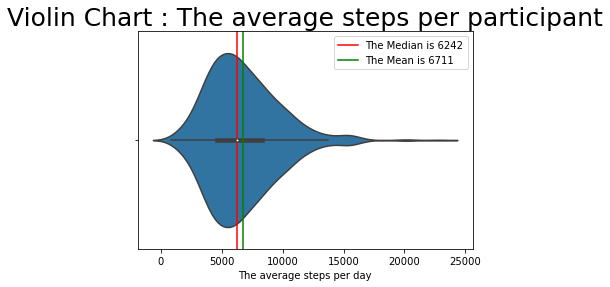

In [19]:
medianline = df_full['average steps'].median()
meanline = df_full['average steps'].mean()

sns.violinplot(x=df_full['average steps'])
plt.title('Violin Chart : The average steps per participant', fontsize=25)
plt.axvline(medianline, 0, 100, color= 'red', label = 'The Median is '+ str(int(medianline)))
plt.axvline(meanline, 0, 100, color= 'green', label = 'The Mean is '+ str(int(meanline)))
plt.xlabel('The average steps per day')
plt.legend()
plt.show()

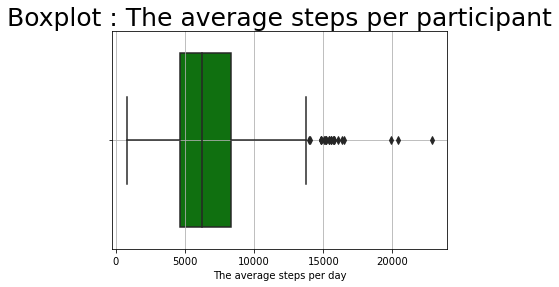

In [20]:
sns.boxplot(x=df_full['average steps'], color='green', fliersize=5 )
plt.title('Boxplot : The average steps per participant', fontsize=25)
plt.xlabel('The average steps per day')
plt.grid(True)
plt.show()

Overall, as can be seen by the visuals above overall the graph is quite normally distributed aside from a slight skewness to the right. this further proven by the median of 6242 being lower than the mean of 6711. this is especially visible in the violin plot.

Additionally, also a boxplot was made show additional insight into the distribution, some important features that be observed. 
- Outliers are only located at the higher end of the boxplot.
- most outliers are cluttered around the 15,000 steps per day.
- the middle 50% is between the 4,800 and 8,000 steps per day.

## RELATIONSHIP ANALYSIS

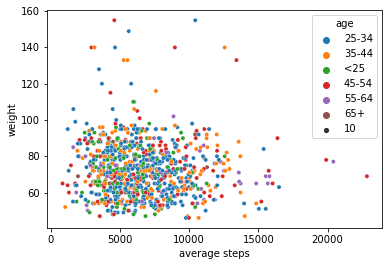

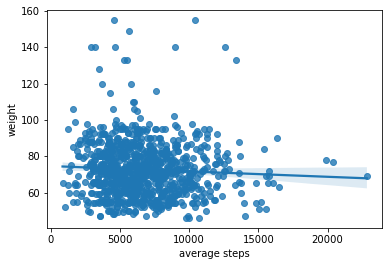

In [21]:
sns.scatterplot(data = df_full,y = 'weight', x = 'average steps',ci=95, hue='age',size=10)
plt.ylabel = 'Weight in KG'
plt.xlabel = 'Average Steps per day'
plt.show()
sns.regplot(data = df_full,y = 'weight', x = 'average steps',ci=95)
plt.xlabel = 'Average Steps per day'
plt.ylabel = 'Weight in KG'
plt.show()

in order to analyse the average steps per day to the varaible weight and age a scatterplot was used. to ensure enough unique data entries were available weight and average steps were used on the Y and X axis respectively, furthermore age was added as a hue element to give further detail. additionally to display a trendline on the graph a regplot was plotted between just weight and average steps.

looking at the plot the following can be observed.
- there seems to be no correlation between the age of the participant and the average steps.
- there seems to be only the slightest correlation between the average steps and weight of the participant, possible causation     is unkown

# FEATURE ENGINEERING - BMI ANALYSIS

In [22]:
df_full['BMI'] = df_full['weight']/pow(df_full['height']/100,2)
df_full.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average steps,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


The BMI index was chosen to represent whether or not the participant has a healthy weight. This index was chosen as it also takes into account the height of the participant. A healthy BMI should be between the 18.5 - 24.9.

In [23]:
BMIscores = df_full['BMI']
sum((BMIscores >= 18.5) & (BMIscores <= 24.9))


542

In [24]:
(542 / BMIscores.count()) * 100

59.36473165388828

as can be seen by the calculations above, around 59.36% has a healthy body weight according to the BMI index.

# EXPLORATORY DATA ANALYSIS - SCATTER MATRIX

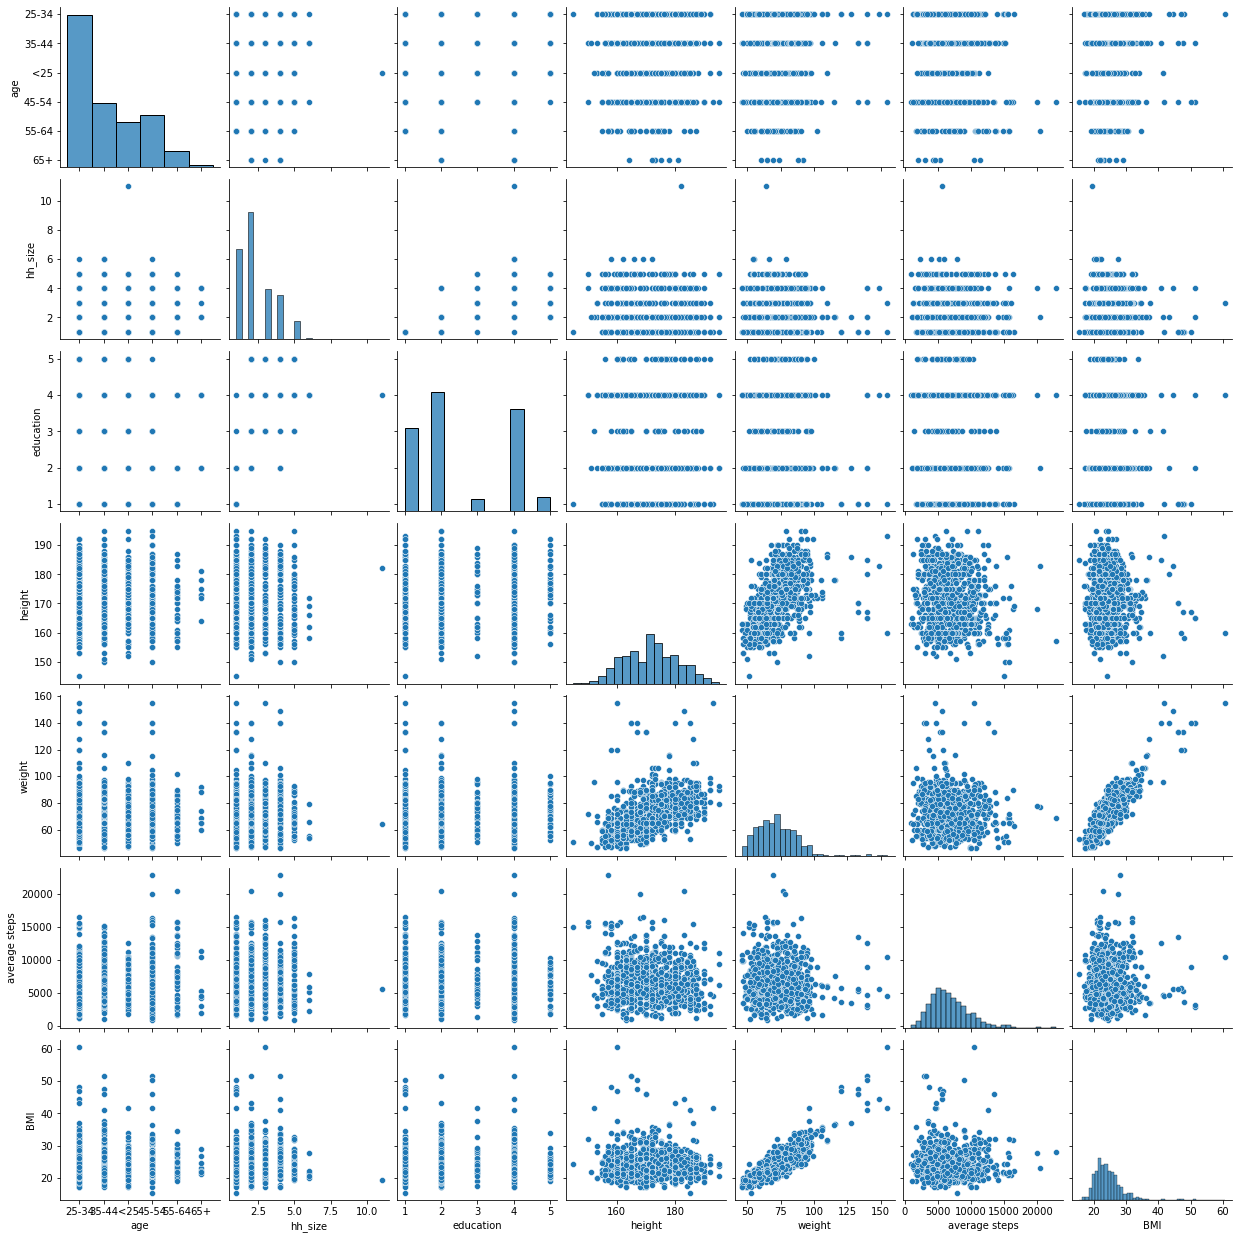

In [25]:
a = sns.pairplot(df_full, vars=['age','hh_size','education','height','weight','average steps','BMI'])
plt.show()

By analyzing the plot matrix above what can be seen is that all the numeric values of the dataset are plotted against eachother in various types of visuals. The following conclusions can be made.

- for catagorical values such as 'hh_size', 'education', and 'age' what can be seen is that the low variation in numbers and clustering of data have caused bars with data points to appear. 
- overall the only visuals that show some correlation or trent are those between weight and height to a very low degree and between height and weight and BMI as the former two were used to calculate the latter.
- the visuals that were created between the same values are showing the distribution of that value, as shown earlier.

In [26]:
df_full[['age','hh_size','education','height','weight','average steps','BMI']].corr()


,hh_size,education,height,weight,average steps,BMI
hh_size,1.000000,0.825585,-0.059704,0.013792,0.038375,0.040767
education,0.825585,1.000000,-0.046343,0.013484,0.021059,0.031304
height,-0.059704,-0.046343,1.000000,0.496814,-0.085334,0.001295
weight,0.013792,0.013484,0.496814,1.000000,-0.056181,0.863605
average steps,0.038375,0.021059,-0.085334,-0.056181,1.000000,-0.021664
BMI,0.040767,0.031304,0.001295,0.863605,-0.021664,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

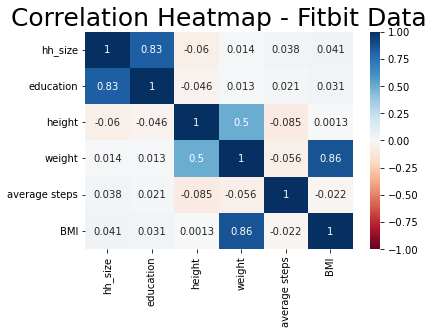

In [27]:
corrframe = df_full[['age','hh_size','education','height','weight','average steps','BMI']].corr()
t = sns.heatmap(corrframe, annot=True, cmap='RdBu', vmin = -1, vmax = 1)
t.set_title('Correlation Heatmap - Fitbit Data', fontsize = 25)
plt.show

By observing the correlation heatmap the following points can be noted.
- Overall allmost no correlation exists within the dataset.
- The oblique line from the upper left to the bottem right is caused by the value being compared to itself therefore always being 1. 
- There is a slight to moderate correlation between the height and weight data of 0.5.
- The high correlation between BMI and Weight and are caused as the latter are used to calculate the BMI.
- There is another strong correlation between hh_size and education.


# LINEAR REGRESSION

This part of the analysis will show the linear regression between variables in the FitBit dataset. this step will generate a formula based on the correlation between two variables. The regression is called linear as the increments to which the trend either rises or falls in remain the same.

In [38]:
pd.get_dummies(data=df_full, columns=['education_1','city','gender','age'])


,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,city_Lyon,city_Montpellier,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,1,4,4,178.0,98.0,NaN,NaN,NaN,NaN,3941.0,...,0,0,0,1,1,0,0,0,0,0
1,2,1,3,180.0,77.0,NaN,NaN,10473.0,705.0,4287.0,...,0,0,0,1,0,1,0,0,0,0
2,3,2,2,180.0,83.0,NaN,11428.0,12523.0,2553.0,190.0,...,0,1,0,1,1,0,0,0,0,0
3,4,1,1,178.0,80.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,0,0,0,1
4,5,3,4,167.0,61.0,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,3,4,165.0,59.0,NaN,4571.0,10471.0,5899.0,15295.0,...,0,0,1,0,0,0,1,0,0,0
925,926,3,5,192.0,90.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
926,927,2,2,181.0,71.0,NaN,NaN,NaN,1623.0,NaN,...,0,1,0,1,0,1,0,0,0,0
927,928,1,1,172.0,65.0,NaN,NaN,14411.0,14364.0,26629.0,...,0,0,1,0,0,0,0,1,0,0


In order to be able to use every single variable in the dataframe the catagorical values where all prepared with dummies using pandas.

Text(0.5, 1.0, 'Linear regression between Weight and Average Steps')

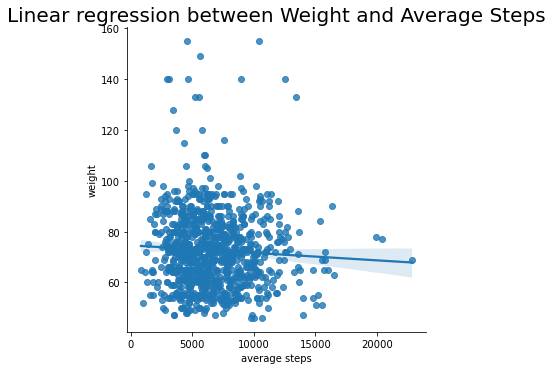

In [37]:
sns.lmplot(data=df_full, x='average steps',y='weight')
plt.title('Linear regression between Weight and Average Steps', fontsize=20)

In [41]:
from sklearn.linear_model import LinearRegression
v1 = df_full[['average steps']]
v2 = df_full['weight']
lin = LinearRegression()
lin.fit(v1,v2)

v4 = lm.intercept_
v5 = lm_coef_[0]
print('The Formula for the regression line is Y = {v4} + {v5}x')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').